In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Overview

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
df = pd.concat([train, test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


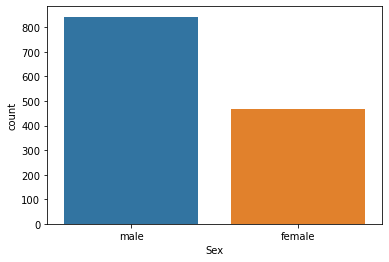

In [9]:
sns.countplot(x='Sex', data=df)
plt.show()

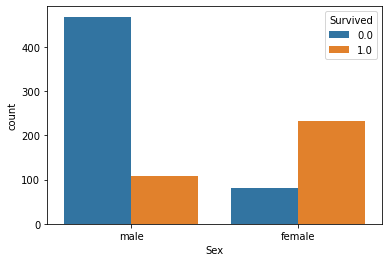

In [10]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

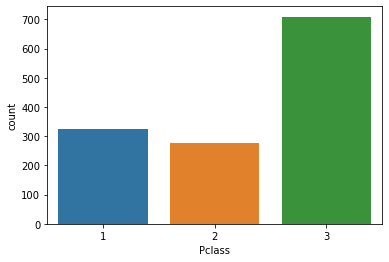

In [11]:
sns.countplot(x='Pclass', data=df)
plt.show()

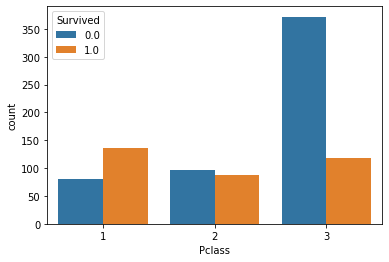

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

# Data Preprocessing 

* firstly drop the unnecessary columns

In [13]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

## Missing Values

In [14]:
df.isna().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

* null values in the Survived column come from the test set

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [16]:
df.Age.isna().sum()

0

In [17]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

## Categorical Variables: Encoding

In [18]:
df.dtypes[df.dtypes == 'object']

Sex         object
Embarked    object
dtype: object

In [19]:
df = pd.get_dummies(data=df, columns=['Sex', 'Embarked'])

* if the passenger has SibSp the hasSibSp value will be 1

In [20]:
def has_SibSp(x):
    if (x > 0):
        return 1
    else: 
        return 0

In [21]:
df['hasSibSp'] = df['SibSp'].apply(has_SibSp)
df.drop('SibSp', axis=1, inplace=True)

In [22]:
df.hasSibSp.value_counts()

0    891
1    418
Name: hasSibSp, dtype: int64

In [23]:
def has_Parch(x):
    if (x > 0):
        return 1
    else: 
        return 0

In [24]:
df['hasParch'] = df['Parch'].apply(has_Parch)
df.drop('Parch', axis=1, inplace=True)

In [25]:
df.hasParch.value_counts()

0    1002
1     307
Name: hasParch, dtype: int64

In [26]:
def inverse_Pclass(x):
    if x == 1:
        return 3
    if x == 2:
        return 2
    if x == 3:
        return 1

In [27]:
df['Pclass'] = df['Pclass'].apply(inverse_Pclass)

In [28]:
df.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [31]:
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [32]:
df.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,hasSibSp,hasParch
0,0.0,1,-0.611972,-0.503595,0,1,1,0
1,1.0,3,0.630431,0.734503,1,0,1,0
2,1.0,1,-0.301371,-0.490544,1,0,0,0
3,1.0,3,0.397481,0.382925,1,0,1,0
4,0.0,1,0.397481,-0.488127,0,1,0,0


## Split Dataset

In [33]:
train_df = df[:891]

In [34]:
test_df = df[891:]

In [35]:
test_df.drop('Survived', axis=1, inplace=True)

In [36]:
X = train_df.drop('Survived', axis=1)
y = train_df[['Survived']]

In [37]:
X_train, X_test = train_test_split(X, random_state=0)

In [38]:
y_train, y_test = train_test_split(y, random_state=0)

In [39]:
X_train.shape, y_train.shape

((668, 7), (668, 1))

In [40]:
X_test.shape, y_test.shape

((223, 7), (223, 1))

# Model

In [41]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [42]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [43]:
preds = clf.predict(X_test)

In [44]:
score = clf.score(X_test, y_test)*100

print(f"Accuracy score: {score:.2f}%")

Accuracy score: 86.10%


<b> but i will use the whole training set to get better result </b>

In [45]:
clf_test = RandomForestClassifier(max_depth=10, random_state=0)

In [46]:
clf_test.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=0)

In [47]:
pred_test = clf_test.predict(test_df.values)

# Output

In [48]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_test.astype(int)
})
submission.to_csv('submission.csv', index=False)

In [49]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
